In [1]:
import pandas as pd
import os
import json


from IPython.display import display

## get files:

In [2]:
questionare_path = "../res/user_data/questionare.xlsx"
participant_order_path = "../res/participant_order.xlsx"
user_data_path = "../res/user_data/"

chat_bot_files  = [f for f in os.listdir(user_data_path) if f.endswith('.json')]

df_questionare = pd.read_excel(open(questionare_path, 'rb'), index_col=0)
df_participant_order = pd.read_excel(open(participant_order_path, 'rb'), index_col=0)


In [3]:
#df_questionare.where(df_questionare['Participant code'] == 4 & df_questionare['Completion time'] == "2023-10-28 21:02:47", inplace=True)
df_questionare = df_questionare.drop(22)
#df_questionare

## questionare data preparation:

In [4]:
question_labels = ["The chatbot’s personality was realistic and engaging",
                   "The chatbot seemed too robotic",
                   "The chatbot was welcoming during initial setup",
                   "The chatbot seemed very unfriendly",
                   "The chatbot explained its scope and purpose well",
                   "The chatbot gave no indication as to its purpose",
                   "The chatbot was easy to navigate","It would be easy to get confused when using the chatbot",
                   "The chatbot understood me well","The chatbot failed to recognise a lot of my inputs",
                   "Chatbot responses were useful, appropriate and informative","Chatbot responses were irrelevant",
                   "The chatbot coped well with any errors or mistakes",
                   "The chatbot seemed unable to handle any errors",
                   "The chatbot was very easy to use",
                   "The chatbot was very complex"
                   ]
question_labels_2 = [x + "2" for x in question_labels]
rename_dict = {v: k for k, v in zip(question_labels, question_labels_2)}



In [5]:
df = df_questionare.merge(df_participant_order, left_on="Participant code", right_on="Participant number")
df.drop(columns=["Please complete the first three trials", "Please complete the last three trials", 'Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6'], inplace=True)
df.drop(columns=["​Experiment Description\n\nThe aim of the project is to determine how the communication style of a chatbot impacts the perceived quality of it. The communication styles vary on formality of language..."], inplace=True)
display(df)

,Start time,Completion time,Email,Name,Language,Last modified time,Participant code,Age,The chatbot’s personality was realistic and engaging,The chatbot seemed too robotic,...,It would be easy to get confused when using the chatbot2,The chatbot understood me well2,The chatbot failed to recognise a lot of my inputs2,"Chatbot responses were useful, appropriate and informative2",Chatbot responses were irrelevant2,The chatbot coped well with any errors or mistakes2,The chatbot seemed unable to handle any errors2,The chatbot was very easy to use2,The chatbot was very complex2,Chatbot group start
0,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,6,23,Agree,Strongly agree,...,Agree,Disagree,Agree,Agree,Disagree,Disagree,Neutral,Agree,Disagree,Informal
1,2023-10-24 16:25:52,2023-10-24 17:05:53,anonymous,NaN,NaN,NaN,25,25,Agree,Disagree,...,Agree,Agree,Neutral,Agree,Disagree,Disagree,Disagree,Agree,Agree,Formal
2,2023-10-24 21:38:57,2023-10-24 21:52:38,anonymous,NaN,NaN,NaN,1,24,Neutral,Agree,...,Agree,Agree,Neutral,Agree,Disagree,Neutral,Neutral,Agree,Neutral,Formal
3,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,2,28,Neutral,Agree,...,Agree,Neutral,Neutral,Agree,Strongly disagree,Disagree,Agree,Disagree,Disagree,Informal
4,2023-10-25 18:47:38,2023-10-25 19:02:51,anonymous,NaN,NaN,NaN,9,26,Disagree,Agree,...,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Agree,Agree,Disagree,Formal
5,2023-10-25 20:01:19,2023-10-25 20:19:25,anonymous,NaN,NaN,NaN,3,60,Strongly disagree,Neutral,...,Disagree,Strongly disagree,Agree,Neutral,Disagree,Disagree,Neutral,Agree,Disagree,Formal
6,2023-10-25 22:35:34,2023-10-25 23:10:42,anonymous,NaN,NaN,NaN,7,26,Disagree,Agree,...,Neutral,Disagree,Neutral,Neutral,Neutral,Disagree,Agree,Neutral,Disagree,Formal
7,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,8,27,Disagree,Neutral,...,Neutral,Agree,Neutral,Agree,Strongly disagree,Neutral,Disagree,Agree,Agree,Informal
8,2023-10-26 00:26:19,2023-10-26 03:32:18,anonymous,NaN,NaN,NaN,24,23,Agree,Neutral,...,Disagree,Agree,Neutral,Agree,Agree,Neutral,Neutral,Neutral,Agree,Informal
9,2023-10-26 12:51:57,2023-10-26 13:06:29,anonymous,NaN,NaN,NaN,19,23,Disagree,Agree,...,Disagree,Disagree,Agree,Agree,Disagree,Disagree,Disagree,Agree,Disagree,Formal


In [6]:
# create df for genz
df_questionare_genz_1 = df[df["Chatbot group start"].str.match("Informal")]
df_questionare_genz_1 = df_questionare_genz_1.drop(columns=question_labels_2)
df_questionare_genz_2 = df[df["Chatbot group start"].str.match("Formal")]
df_questionare_genz_2 = df_questionare_genz_2.drop(columns=question_labels)
df_questionare_genz_2  = df_questionare_genz_2.rename(columns=rename_dict)


df_questionare_genz = pd.concat([df_questionare_genz_1, df_questionare_genz_2 ])
df_questionare_genz["language"] = "genz"
print(len(df_questionare_genz)) 


22


In [7]:
# same as above get df for formal
df_questionare_formal_1 = df[df["Chatbot group start"].str.match("Formal")]
df_questionare_formal_1 = df_questionare_formal_1.drop(columns=question_labels_2)
df_questionare_formal_2 = df[df["Chatbot group start"].str.match("Informal")]
df_questionare_formal_2 = df_questionare_formal_2.drop(columns=question_labels)
df_questionare_formal_2 = df_questionare_formal_2.rename(columns=rename_dict)

df_questionare_formal = pd.concat([df_questionare_formal_1, df_questionare_formal_2 ])
df_questionare_formal = df_questionare_formal.drop(columns=["Chatbot group start"])
df_questionare_formal["language"] = "formal"
#print((df_questionare_formal.columns)) 

In [8]:
df_questionare = pd.concat([df_questionare_genz, df_questionare_formal])
df_questionare = df_questionare.set_index(["Participant code", "language"])
df_questionare = df_questionare.drop(columns=["Chatbot group start"])


In [9]:
# 'Chatbot group start' gives the order of the user did the language options

In [10]:
def calc_CUQ_score(df):
    # step 1:
    agree_scores = {
        "Strongly agree": 5,
        "Agree": 4,
        "Neutral": 3,
        "Disagree": 2,
        "Strongly disagree": 1
    }
    # step 2 and 3:
    # odd and even are swapped, cause we count from 0
    # step 2
    positiv_score = 0
    for i in range(0,len(question_labels), 2):
        positiv_score += agree_scores[df[question_labels[i]]]
    # step 3:
    negative_score = 0
    for i in range(1,len(question_labels), 2):
        negative_score += agree_scores[df[question_labels[i]]]
    
    #step 4:
    positiv_score = positiv_score - 8
    # step 5:
    negative_score = 40 - negative_score
    # step 6:
    cuq_score = positiv_score + negative_score 
    #You should now have a score out of 64 
    if cuq_score > 64:
        raise ValueError("CUQ score is greater than 64")
    # step 7:
    cuq_score = cuq_score / 64 
    cuq_score = cuq_score * 100
    return cuq_score


for index, row in df_questionare.iterrows():
   # print( calc_CUQ_score(row))
    df_questionare.at[index, "CUQ"] = calc_CUQ_score(row)




37.5
46.875
18.75
68.75
50.0
67.1875
71.875
39.0625
37.5
40.625
70.3125
65.625
56.25
54.6875
48.4375
64.0625
62.5
62.5
45.3125
79.6875
31.25
40.625
62.5
40.625
43.75
53.125
43.75
45.3125
40.625
51.5625
42.1875
71.875
48.4375
45.3125
51.5625
53.125
64.0625
60.9375
70.3125
64.0625
64.0625
51.5625
68.75
42.1875


In [11]:
print("Questionare Dataset:")
display(df_questionare)

Questionare Dataset:


,,Start time,Completion time,Email,Name,Language,Last modified time,Age,The chatbot’s personality was realistic and engaging,The chatbot seemed too robotic,The chatbot was welcoming during initial setup,...,It would be easy to get confused when using the chatbot,The chatbot understood me well,The chatbot failed to recognise a lot of my inputs,"Chatbot responses were useful, appropriate and informative",Chatbot responses were irrelevant,The chatbot coped well with any errors or mistakes,The chatbot seemed unable to handle any errors,The chatbot was very easy to use,The chatbot was very complex,CUQ
Participant code,language,,,,,,,,,,,,,,,,,,,,,
6,genz,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,23,Agree,Strongly agree,Agree,...,Strongly agree,Disagree,Strongly agree,Neutral,Agree,Strongly disagree,Strongly agree,Disagree,Disagree,37.5000
2,genz,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,28,Neutral,Agree,Neutral,...,Agree,Disagree,Neutral,Agree,Disagree,Strongly disagree,Neutral,Neutral,Disagree,46.8750
8,genz,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,27,Disagree,Neutral,Agree,...,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Agree,18.7500
24,genz,2023-10-26 00:26:19,2023-10-26 03:32:18,anonymous,NaN,NaN,NaN,23,Agree,Neutral,Agree,...,Neutral,Agree,Disagree,Agree,Disagree,Agree,Neutral,Agree,Disagree,68.7500
20,genz,2023-10-26 14:05:23,2023-10-26 14:27:20,anonymous,NaN,NaN,NaN,24,Agree,Neutral,Agree,...,Agree,Disagree,Disagree,Neutral,Agree,Disagree,Disagree,Neutral,Neutral,50.0000
10,genz,2023-10-27 12:53:26,2023-10-27 13:14:54,anonymous,NaN,English (United Kingdom)‎,NaN,31,Agree,Disagree,Agree,...,Disagree,Agree,Agree,Agree,Neutral,Agree,Disagree,Disagree,Disagree,67.1875
12,genz,2023-10-27 17:19:09,2023-10-27 17:33:17,anonymous,NaN,English (United Kingdom)‎,NaN,23,Agree,Disagree,Strongly agree,...,Disagree,Disagree,Strongly disagree,Agree,Strongly disagree,Disagree,Disagree,Strongly agree,Neutral,71.8750
14,genz,2023-10-27 17:57:33,2023-10-27 18:18:08,anonymous,NaN,English (United Kingdom)‎,NaN,26,Disagree,Disagree,Neutral,...,Strongly agree,Strongly disagree,Strongly agree,Neutral,Neutral,Strongly disagree,Agree,Agree,Disagree,39.0625
4,genz,2023-10-28 21:05:53,2023-10-28 21:15:20,anonymous,NaN,English (United Kingdom)‎,NaN,23,Neutral,Disagree,Neutral,...,Strongly agree,Strongly disagree,Strongly agree,Disagree,Disagree,Neutral,Strongly agree,Disagree,Agree,37.5000


In [12]:
# user id

# total time (average of tasks with same language)
# number of suggestions (average of tasks with same language)
# number of turns (average of tasks with same language)
# number_of_suggestions
# number_of_restarts
df_chat = pd.DataFrame(columns=["user_id",  "language",  "number_of_turns", "time", "number_of_suggestions", "number_of_restarts"])
for chat_data in chat_bot_files:
    chat_data = json.load(open(user_data_path + chat_data))
    row = df_chat.loc[(df_chat["user_id"] == chat_data["user_id"] ) & (df_chat["language"] == chat_data["configuration"]["language"]  ) ]
    total_time = sum([x["response_seconds"] for x in chat_data["turns"]])
    if row.empty:

        row = pd.DataFrame([[ chat_data["user_id"],  chat_data["configuration"]["language"],  len(chat_data["turns"]) , total_time, chat_data["number_suggestions"], chat_data["number_restart"] ] ], 
                           columns=["user_id",  "language", "number_of_turns", "time", "number_of_suggestions", "number_of_restarts"])

        df_chat = pd.concat([df_chat, row])
    else:
        row.loc[0,"number_of_turns"] = row.loc[0,"number_of_turns"] + len(chat_data["turns"])
        row.loc[0,"time"] = row.loc[0,"time"] + total_time
        row.loc[0,"number_of_suggestions"] = row.loc[0,"number_of_suggestions"] + chat_data["number_suggestions"]
        row.loc[0, "number_of_restarts"] = row.loc[0, "number_of_restarts"] + chat_data["number_restart"]
        df_chat.loc[(df_chat["user_id"] == chat_data["user_id"] ) & (df_chat["language"] == chat_data["configuration"]["language"]  ) ] = row

df_chat["number_of_turns"] = df_chat["number_of_turns"] / 3
df_chat["time"] = df_chat["time"] / 3
df_chat["number_of_suggestions"] = df_chat["number_of_suggestions"] / 3
df_chat["number_of_restarts"] = df_chat["number_of_restarts"] / 3



df_chat["language"] = df_chat['language'].str.lower()
#df_chat.rename(columns={"user_id": "Participant code"}, inplace=True)
df_chat.set_index(["user_id", "language"], inplace=True)
print("Chatbot Dataframe:")
display(df_chat)

Chatbot Dataframe:


,,number_of_turns,time,number_of_suggestions,number_of_restarts
user_id,language,,,,
20,formal,9.333333,97.563569,0.666667,0.0
23,formal,7.666667,75.644213,0.666667,0.333333
12,genz,11.0,100.413311,2.0,0.333333
11,formal,12.333333,93.976582,1.333333,0.333333
13,formal,9.666667,77.838563,1.0,0.0
6,genz,12.333333,83.626476,1.0,1.333333
20,genz,10.666667,92.969189,0.666667,0.666667
4,formal,4.666667,42.064284,0.666667,0.333333
8,genz,5.666667,93.257106,0.0,0.0


In [13]:
df_chat.reset_index(inplace=True)
df_questionare.reset_index(inplace=True)

In [14]:
### the index -unique identifier- of df is (participant code, language)
df_questionare["index"] = df_questionare["Participant code"].astype(str) + df_questionare["language"]
df_chat["index"] = df_chat["user_id"] + df_chat["language"]
df = df_questionare.merge(df_chat, left_on=["index"], right_on=["index"])
df = df.drop(columns=["index", "language_y", "user_id"] )# deleting other user id, so we dont need to reorder to have it at the first position..
df = df.rename(columns={"language_x": "language", "Participant code": "user_id"})
#df.reset_index (inplace=True)  # cause idk pandas i cant work with this index
#df.set_index(["Participant code", "language"], inplace=True)
print("Merged Dataframe:")
display(df)


Merged Dataframe:


,user_id,language,Start time,Completion time,Email,Name,Language,Last modified time,Age,The chatbot’s personality was realistic and engaging,...,Chatbot responses were irrelevant,The chatbot coped well with any errors or mistakes,The chatbot seemed unable to handle any errors,The chatbot was very easy to use,The chatbot was very complex,CUQ,number_of_turns,time,number_of_suggestions,number_of_restarts
0,6,genz,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,23,Agree,...,Agree,Strongly disagree,Strongly agree,Disagree,Disagree,37.5000,12.333333,83.626476,1.0,1.333333
1,2,genz,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,28,Neutral,...,Disagree,Strongly disagree,Neutral,Neutral,Disagree,46.8750,8.0,94.155803,0.0,0.666667
2,8,genz,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,27,Disagree,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Agree,18.7500,5.666667,93.257106,0.0,0.0
3,20,genz,2023-10-26 14:05:23,2023-10-26 14:27:20,anonymous,NaN,NaN,NaN,24,Agree,...,Agree,Disagree,Disagree,Neutral,Neutral,50.0000,10.666667,92.969189,0.666667,0.666667
4,10,genz,2023-10-27 12:53:26,2023-10-27 13:14:54,anonymous,NaN,English (United Kingdom)‎,NaN,31,Agree,...,Neutral,Agree,Disagree,Disagree,Disagree,67.1875,11.333333,99.417582,1.333333,0.666667
5,12,genz,2023-10-27 17:19:09,2023-10-27 17:33:17,anonymous,NaN,English (United Kingdom)‎,NaN,23,Agree,...,Strongly disagree,Disagree,Disagree,Strongly agree,Neutral,71.8750,11.0,100.413311,2.0,0.333333
6,14,genz,2023-10-27 17:57:33,2023-10-27 18:18:08,anonymous,NaN,English (United Kingdom)‎,NaN,26,Disagree,...,Neutral,Strongly disagree,Agree,Agree,Disagree,39.0625,10.0,145.119985,1.333333,0.333333
7,4,genz,2023-10-28 21:05:53,2023-10-28 21:15:20,anonymous,NaN,English (United Kingdom)‎,NaN,23,Neutral,...,Disagree,Neutral,Strongly agree,Disagree,Agree,37.5000,15.666667,139.118606,0.333333,0.666667
8,25,genz,2023-10-24 16:25:52,2023-10-24 17:05:53,anonymous,NaN,NaN,NaN,25,Strongly agree,...,Disagree,Disagree,Disagree,Agree,Agree,70.3125,11.333333,137.616361,2.0,0.333333
9,1,genz,2023-10-24 21:38:57,2023-10-24 21:52:38,anonymous,NaN,NaN,NaN,24,Agree,...,Disagree,Neutral,Neutral,Agree,Neutral,65.6250,8.0,125.788085,0.0,0.0


Text(0, 0.5, 'user satisfaction (cuq)')

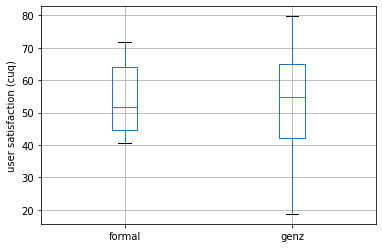

In [15]:
import matplotlib.pyplot as plt

cuq_formal = df[df["language"].str.match("formal")]["CUQ"]

cuq_genz = df[df["language"].str.match("genz")]["CUQ"]
cuq_plot = pd.DataFrame({'formal':cuq_formal,
                   'genz':cuq_genz})
#df_plot = df[df["language"].str.match("formal")][]

#print (cuq_formal.columns)
#df_plot = df_plot.set_index(["user_id", "language"])

bplot = cuq_plot.boxplot()
bplot.set_ylabel('user satisfaction (cuq)')
#cuq_genz.plot()
#df.plot()

some statiscitcs:

In [16]:
total = pd.concat([df_languages["genz"],df_languages["formal"]])
print("mean of genz and formal and total:", np.mean(df_languages["genz"]), np.mean(df_languages["formal"]), np.mean(total))
print("median of genz and formal and total:", np.median(df_languages["genz"]), np.median(df_languages["formal"]), np.median(total))
print("standard deviation of genz and formal and total:", np.std(df_languages["genz"]), np.std(df_languages["formal"]), np.std(total))

NameError: name 'df_languages' is not defined

In [ ]:
import scipy.stats as stats
print("ttest:" , stats.ttest_ind(a = df_languages["formal"], b= df_languages["genz"]))
print("wilcoxon:" , stats.wilcoxon(x = df_languages["formal"], y= df_languages["genz"]))


ttest: TtestResult(statistic=-0.10546786488216772, pvalue=0.9170551955280373, df=20.0)
wilcoxon: WilcoxonResult(statistic=26.5, pvalue=0.9187074054282889)


/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Time Stats

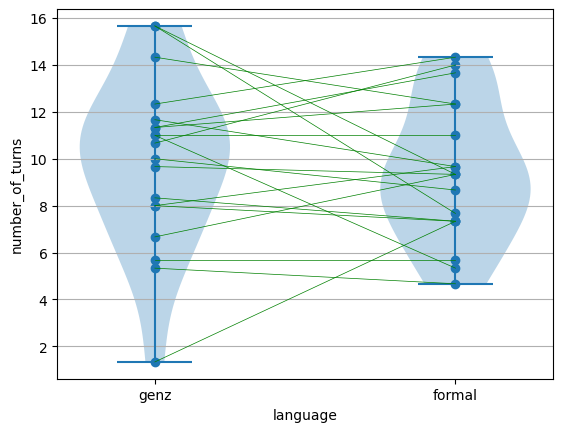

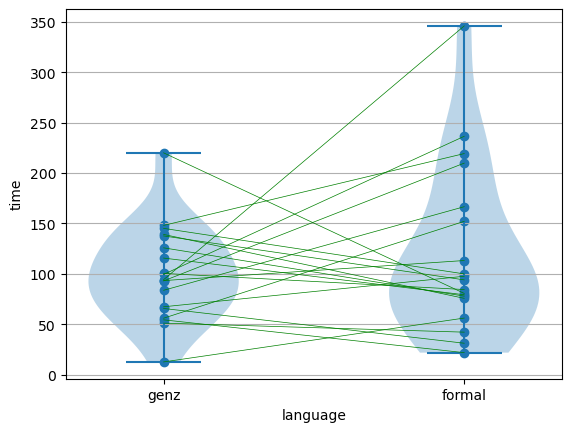

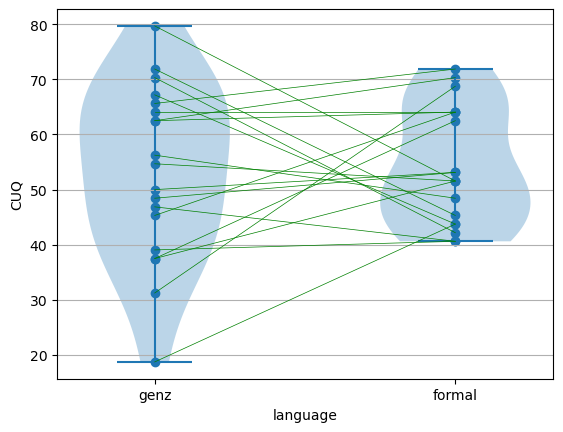

In [27]:
import visualization as vis
import importlib
importlib.reload(vis)



fig, axes = vis.violin_with_dots(df,x="language", y="number_of_turns") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="time") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="CUQ") #, title="Time", ylabel="Time (s)", xlabel="Language"


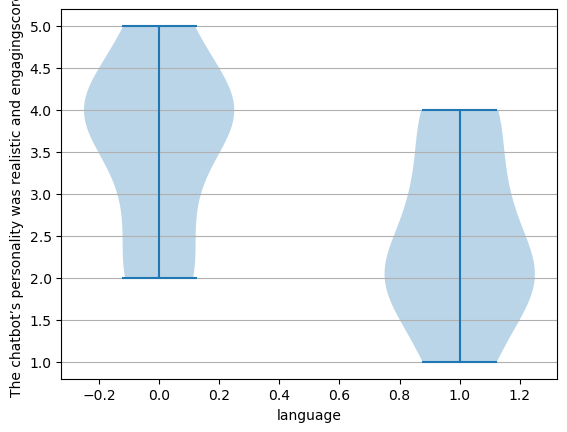

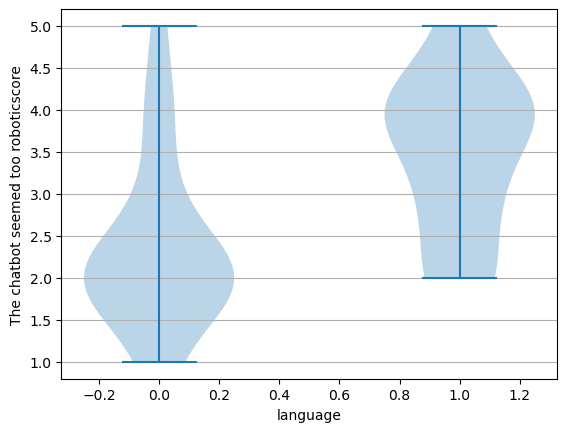

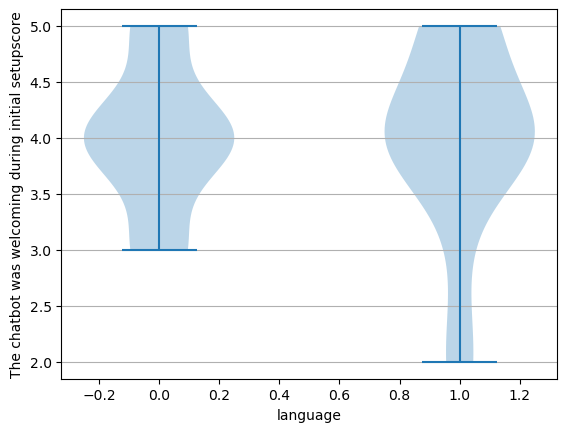

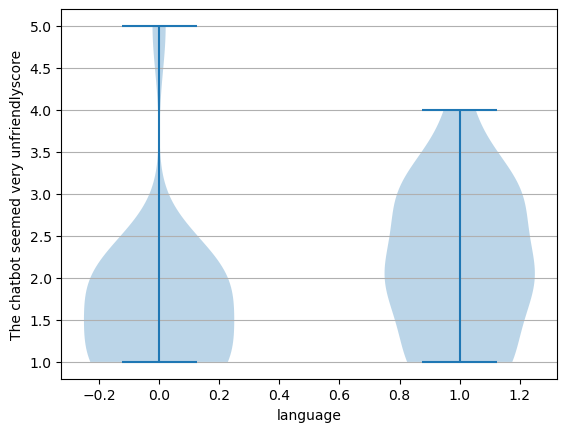

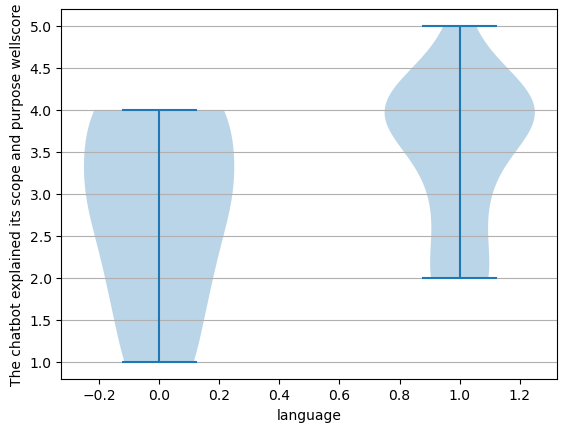

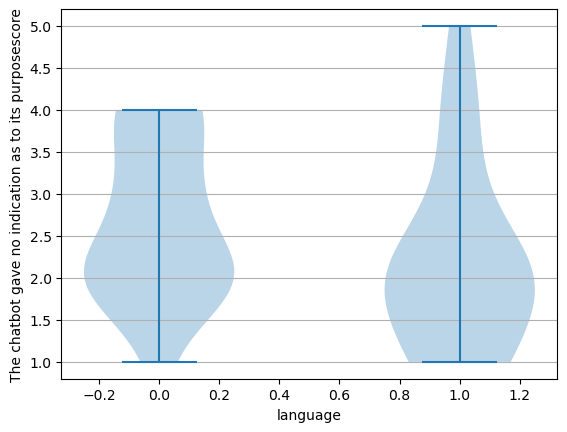

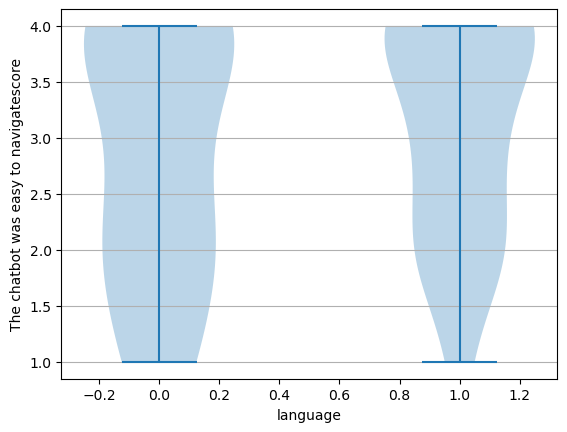

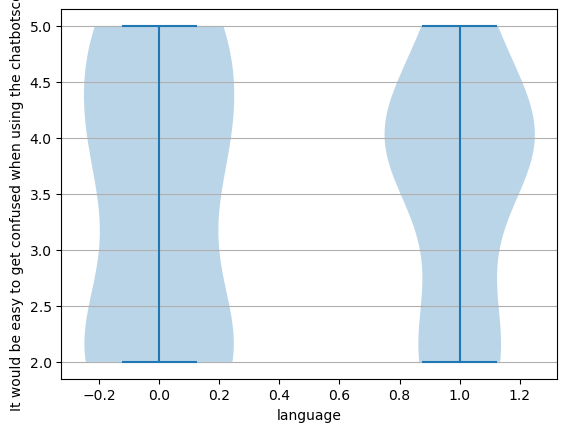

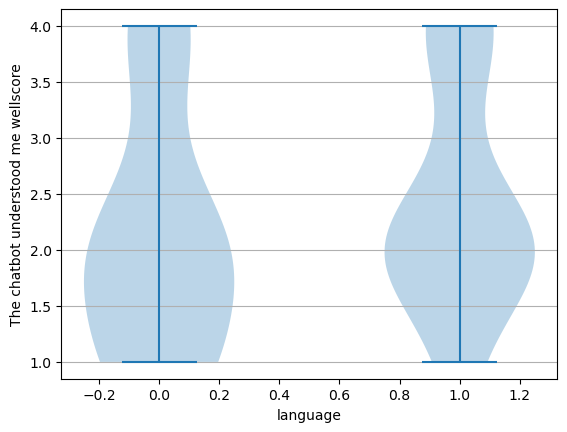

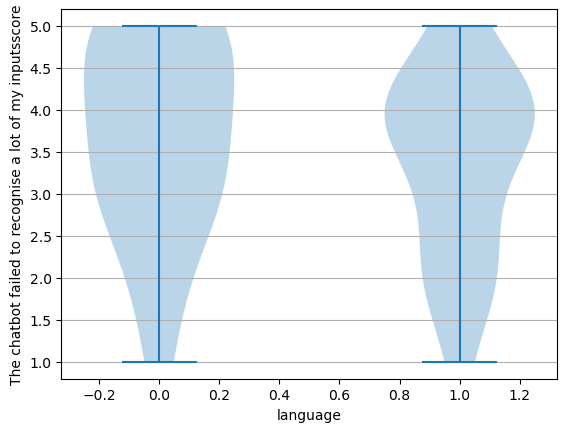

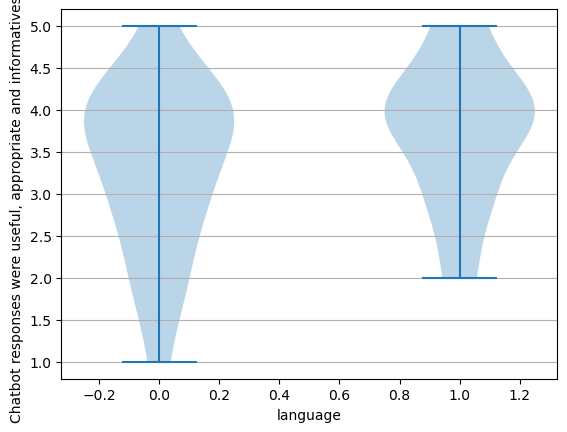

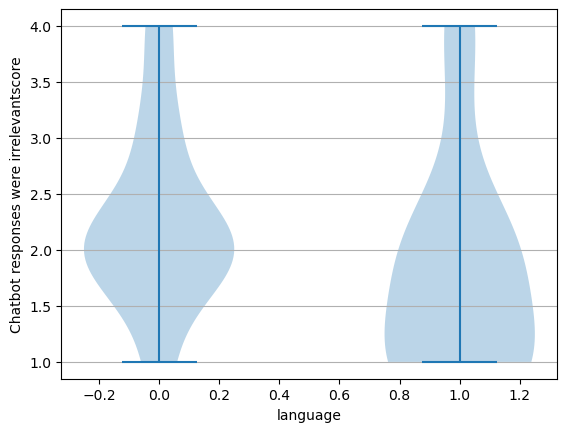

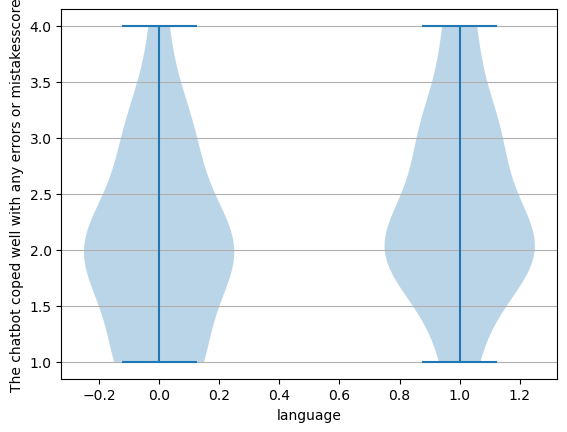

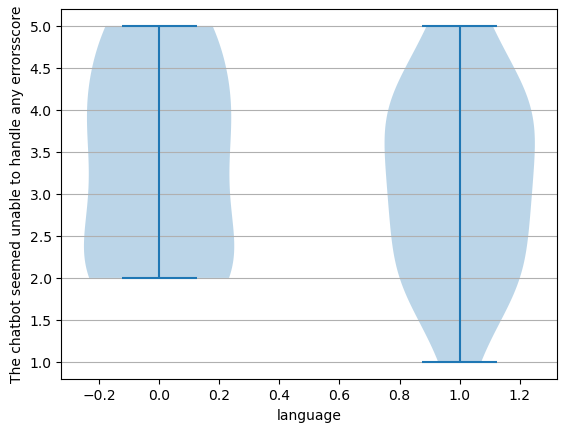

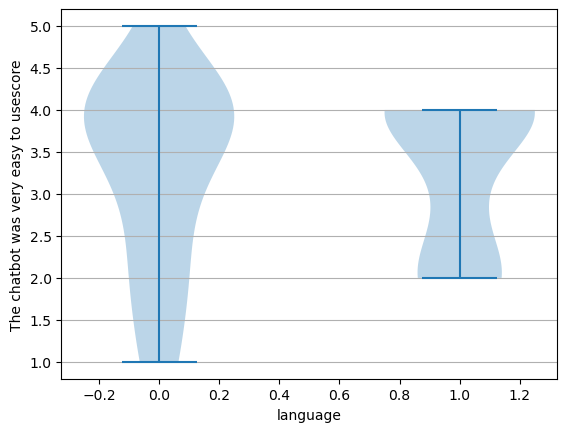

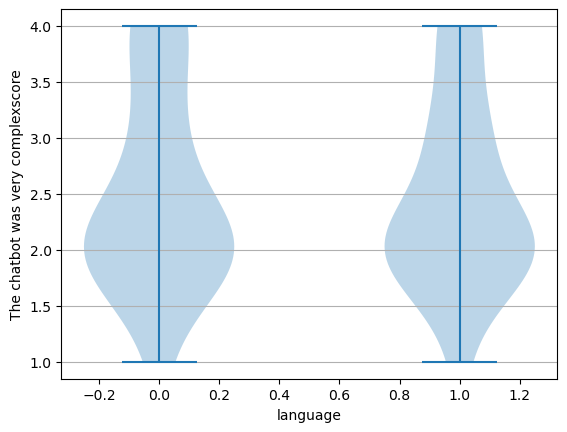

In [28]:
def score_label(x):
    agree_scores = {
        "Strongly agree": 5,
        "Agree": 4,
        "Neutral": 3,
        "Disagree": 2,
        "Strongly disagree": 1
    }
    return agree_scores[x]

for label in question_labels:
    df[label+ "score"] = df[label].apply(lambda x: score_label(x))
    #display(df["labelscore"])
    fig, axes = vis.violin_with_dots(df,x="language", y=label+"score", plot_lines=False, plot_dots=False) 


In [ ]:
total = pd.concat([time_df_languages["genz"],time_df_languages["formal"]])
print("mean of genz and formal and total:", np.mean(time_df_languages["genz"]), np.mean(time_df_languages["formal"]), np.mean(total))
print("median of genz and formal and total:", np.median(time_df_languages["genz"]), np.median(time_df_languages["formal"]), np.median(total))
print("standard deviation of genz and formal and total:", np.std(time_df_languages["genz"]), np.std(time_df_languages["formal"]), np.std(total))

NameError: name 'time_df_languages' is not defined

In [ ]:
import scipy.stats as stats
print("ttest:" , stats.ttest_ind(a = time_df_languages["formal"], b= time_df_languages["genz"]))
print("wilcoxon:" , stats.wilcoxon(x = time_df_languages["formal"], y= time_df_languages["genz"]))


ttest: TtestResult(statistic=1.5156474531673687, pvalue=0.14697286387769315, df=18.0)
wilcoxon: WilcoxonResult(statistic=17.0, pvalue=0.322265625)


Turns taken Stats

In [ ]:
total = pd.concat([turns_df_languages["genz"],turns_df_languages["formal"]])
print("mean of genz and formal and total:", np.mean(turns_df_languages["genz"]), np.mean(turns_df_languages["formal"]), np.mean(total))
print("median of genz and formal and total:", np.median(turns_df_languages["genz"]), np.median(turns_df_languages["formal"]), np.median(total))
print("standard deviation of genz and formal and total:", np.std(turns_df_languages["genz"]), np.std(turns_df_languages["formal"]), np.std(total))

mean of genz and formal and total: 10.233333333333334 10.4 10.316666666666668
median of genz and formal and total: 10.166666666666666 9.5 9.666666666666666
standard deviation of genz and formal and total: 3.098565976562563 2.502443250549794 2.8175541008312703


In [ ]:
import scipy.stats as stats
print("ttest:" , stats.ttest_ind(a = turns_df_languages["formal"], b= turns_df_languages["genz"]))
print("wilcoxon:" , stats.wilcoxon(x = turns_df_languages["formal"], y= turns_df_languages["genz"]))


ttest: TtestResult(statistic=0.1255372986970487, pvalue=0.90148970444542, df=18.0)
wilcoxon: WilcoxonResult(statistic=19.0, pvalue=0.6784023758521882)


/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
